<a href="https://colab.research.google.com/github/paulIruaRosero/Sistemas-dinamicos-y-control/blob/main/Introducci%C3%B3n/Ejercicio_modelo_de_control_de_crucero.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# vamos a insertar la ecuación diferencial del sistema modelo de control de crucero

In [54]:
import sympy as sp
import sympy as sym
sp.init_printing()

# Parámetros
m = 1000
b = 50

# Variables simbólicas
t, s = sp.symbols('t s', real=True, positive=True)
u = sp.Function('u')(t)
v = sp.Function('v')(t)

# EDO
ode = sp.Eq(sp.diff(v, t) + b*v/m, u/m)
print("Ecuación diferencial original:")
ode

Ecuación diferencial original:


v(t)   d          u(t)
──── + ──(v(t)) = ────
 20    dt         1000

# vamos a calcular la transformada de laplace del sistema

In [55]:
lhs=sp.laplace_transform(sp.diff(v, t) + b*v/m, t, s, noconds=True)
rhs=sp.laplace_transform(u/m, t, s, noconds=True)
laplace_eq = sp.Eq(lhs, rhs)
print("Ecuación diferencial en el dominio de Laplace:")
laplace_eq

Ecuación diferencial en el dominio de Laplace:


                                 LaplaceTransform(v(t), t, s)          Laplace ↪
s⋅LaplaceTransform(v(t), t, s) + ──────────────────────────── - v(0) = ─────── ↪
                                              20                               ↪

↪ Transform(u(t), t, s)
↪ ─────────────────────
↪      1000            

# calculamos la función de transferencia

In [56]:
# Definir símbolos para las transformadas de Laplace y la condición inicial
V_s_sym = sp.Symbol('V_s')
U_s_sym = sp.Symbol('U_s')
v0 = sp.Symbol('v(0)')

# Construir la ecuación equivalente en términos de los nuevos símbolos
# Based on: s*LaplaceTransform(v(t), t, s) + LaplaceTransform(v(t), t, s)/20 - v(0) = LaplaceTransform(u(t), t, s)/1000
equivalent_eq = sp.Eq(s * V_s_sym + V_s_sym / (m/b) - v0, U_s_sym / m)

# Resolver para V_s_sym
V_s_expr = sp.solve(equivalent_eq, V_s_sym)[0]

# Asumir condiciones iniciales cero (v(0) = 0) para la función de transferencia
V_s_zero_ic = V_s_expr.subs(v0, 0)

# La función de transferencia es G(s) = V(s) / U(s)
transfer_function = sp.simplify(V_s_zero_ic / U_s_sym)

print("Función de transferencia G(s) = V(s) / U(s):")
transfer_function

Función de transferencia G(s) = V(s) / U(s):


    0.02    
────────────
20.0⋅s + 1.0

# vamos a calcular la respuesta al escalón de magnitud 500

In [57]:
U = 500/s
V1 = transfer_function*U
V1

      10.0      
────────────────
s⋅(20.0⋅s + 1.0)

In [58]:
V = sym.inverse_laplace_transform(V1, s, t) #trasformada inversa
V

             -0.05⋅t
10.0 - 10.0⋅ℯ       

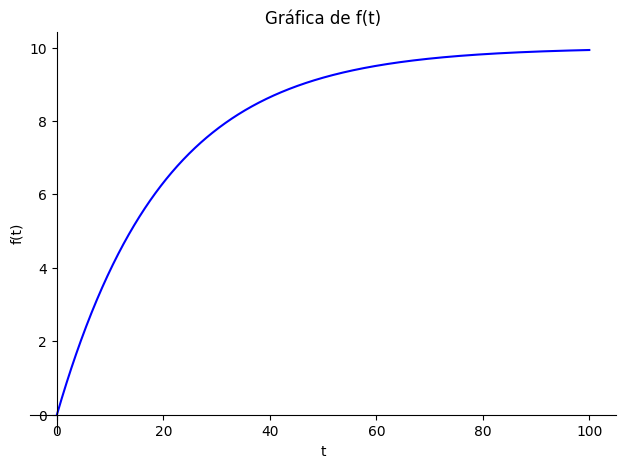

In [59]:
sym.plot(V, (t, 0, 100), title='Gráfica de f(t)', ylabel='f(t)', xlabel='t', line_color='blue', grid=True)